In [53]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

#nltk.download('stopwords')
# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'gutenberg-tm', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made']

    
# We most likely would like to remove html markup
def cleanHtml(html):
    #print(html)
    html = html.replace( '&#8217;', '' )
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"`\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
# Modified version of get_wf() provided by Dr. Mockus
# Define a function to get text/clean/calculate frequency
def get_wf(book_file, start, stop):
   
    wf = Counter()

    current_line = 0

    # split lines into list by spaces  
    for line in book_file:
    
        current_line += 1
        if current_line < start:
            continue
        if current_line > stop:
            break
    
    
        line = line.rstrip('\n').split()
    
        # clean all words in each line
        for i in range( 0, len(line) ):
            line[i] = cleanWord( line[i] )

        wf.update(line)
  
    # Remove stop words from the dictionary wf
    #for k in stop_words:
    #    wf. pop(k, None)
      
    #how many regular words in the document?
    tw = 0
    for w in wf:
        tw += wf[w] 

    return wf, tw

# define a function to get text/clean/calculate frequency
def debate_word_dictionary_generator (URL, name1, name2, modList):
    # first get the web page
    r = requests.get(URL)
    
    
    # Now clean
    # remove html markup
    t = cleanHtml(r.text).lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord(wds[i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf1.pop(k, None)
        wf2.pop(k, None)
            
        
    #how many regular words in the document?
    tw1 = 0
    for w in wf1:
        tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
        tw2 += wf2[w] 
    
    # Get ordered list
    #wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    #ml1 = min(len(wfs1),30)
    
    #wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    #ml2 = min(len(wfs2),30)
    

    #Reverse the list because barh plots items from the bottom
    #return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2)]
    
    
    return wf1, wf2

for i in range(len(stop_words)):
    stop_words[i] = cleanWord(stop_words[i])
    
# Now populate two lists    
debate1 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/september-30-2004-debate-transcript/', 'bush:', 'kerry:', ['lehrer:'])
debate2 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-8-2004-debate-transcript/', 'bush:', 'kerry:', ['gibson:'])
debate3 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-13-2004-debate-transcript/', 'bush:', 'kerry:', ['schieffer:'])


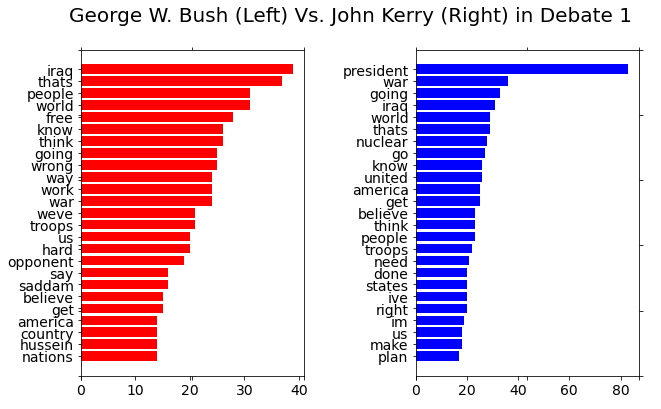

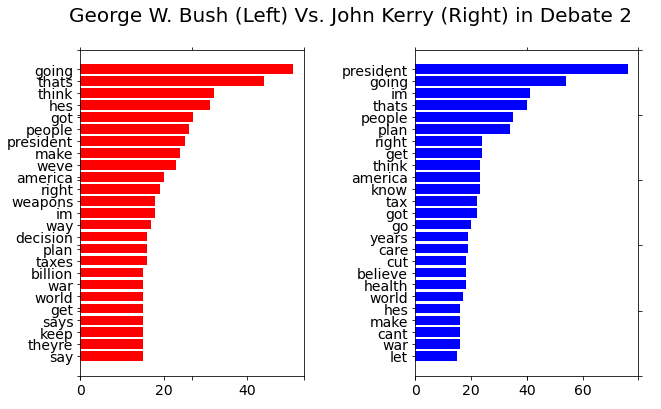

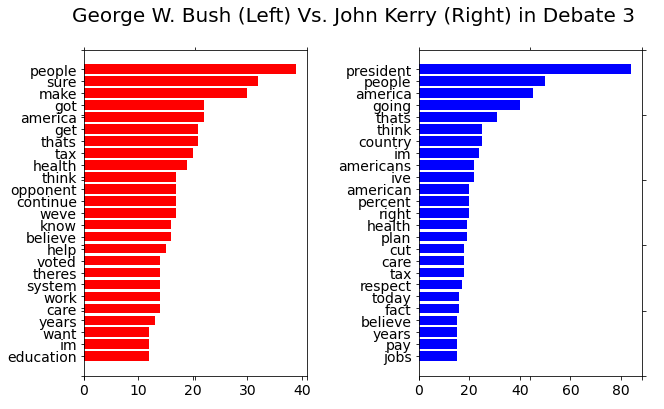

In [54]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
# Slightly modified version of plotTwoLists provided by Dr. Mockus
def plotTwoLists (wf1, c1, wf2, c2, num_words, title):
    
    # Put num_words most frequent words into lists 
    sub_list1 = wf1.most_common(num_words)
    sub_list2 = wf2.most_common(num_words)
    
    # Reverse order for plotting
    sub_list1.reverse()
    sub_list2.reverse()
    
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', \
                    bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(sub_list1)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in sub_list1 ])
    ax1 .barh (range(len(sub_list1)), \
                   [ x [1] for x in sub_list1 ], align='center', color=c1)

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(sub_list2)) 
    pylab .yticks (pos, [ x [0] for x in sub_list2 ])
    ax2 .barh (range (len(sub_list2)), \
                   [ x [1] for x in sub_list2 ], align='center', color=c2)

    plt.show()

    
plotTwoLists (debate1[0], 'r', debate1[1], 'b', 25,\
              'George W. Bush (Left) Vs. John Kerry (Right) in Debate 1')
plotTwoLists (debate2[0], 'r', debate2[1], 'b', 25,\
              'George W. Bush (Left) Vs. John Kerry (Right) in Debate 2')
plotTwoLists (debate3[0], 'r', debate3[1], 'b', 25,\
              'George W. Bush (Left) Vs. John Kerry (Right) in Debate 3')


<h3>Additional Analyses</h3>

<p>I wanted to see if the average word length of a candidate would correlate with who would win certain elections.</p>

In [55]:
import nltk 
#nltk.download('vader_lexicon') # one time only
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() # or whatever you want to call it

In [56]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

def debate_word_list (URL, name1, name2, modList):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml(r .text).lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
                
    return [name1Arr, name2Arr]
                
debateArrSent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/september-30-2004-debate-transcript/', 'bush:', 'kerry:', ['lehrer:'])
debateArr2Sent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-8-2004-debate-transcript/', 'bush:', 'kerry:', ['gibson:'])
debateArr3Sent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-13-2004-debate-transcript/', 'bush:', 'kerry:', ['schieffer:'])


cand1_arr = debateArrSent[0] + debateArr2Sent[0] + debateArr3Sent[0]
cand2_arr = debateArrSent[1] + debateArr2Sent[1] + debateArr3Sent[1]

out_str = " "

sent1 = vader.polarity_scores(out_str.join(cand1_arr))
sent2 = vader.polarity_scores(out_str.join(cand2_arr))

print('Bush')
print(sent1)
print('Kerry')
print(sent2)

Bush
{'neg': 0.108, 'neu': 0.721, 'pos': 0.171, 'compound': 1.0}
Kerry
{'neg': 0.107, 'neu': 0.762, 'pos': 0.131, 'compound': 0.9999}


In [57]:
count = 0
total = 0
for word in cand1_arr:
    total += len(word)
    count += 1
    
print('Bush: ' + str(float(total/count)))

count = 0
total = 0
for word in cand2_arr:
    total += len(word)
    count += 1
    
    
print('Kerry: ' + str(float(total/count)))

Bush: 4.371035940803383
Kerry: 4.29614356278606
